# Apache log n-gram analysis

### Data Dictionary
Using additional analysis not shown earlier, I was able to come up with this data dictionary to describe the contents of the data file.

 | Column     | Description |
 |------------|:-----------:|
 | host       | The hostname or IP address making the request to the website |
 | logname    | not a populated field |
 | time       | integer version of unix timestamp |
 | method     | HTTP method for the call |
 | url        | path to the file being requested |
 | response   | HTTP response code for the call |
 | bytes      | Number of bytes returned for the request |
 | referer    | not a populated field |
 | useragent  | not a populated field |

---

### Prerequisites for Python Notebook
 - python 3.x
 - python packages
   - pip3 install pandas
   - pip3 install scikit-learn
   - pip3 install matplotlib
   - pip3 install networkx
 - jupyter notebook --debug > log.file 2>&1
 
### Sample data used for analysis
- http://indeedeng.github.io/imhotep/files/nasa_19950801.tsv (saved in 'rawData/nasa_19950801.tsv')
- http://indeedeng.github.io/imhotep/files/nasa_19950630.22-19950728.12.tsv.gz
- http://indeedeng.github.io/imhotep/files/nasa_19950731.22-19950831.22.tsv.gz

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import hashlib 
import networkx as nx


In [13]:
apache_log_path = 'rawData/nasa_19950801.tsv'
apache_log_data = pd.read_csv(apache_log_path, sep='\t', header=0)

In [14]:
visitor_address = apache_log_data.host
histogram_visitor_address = visitor_address.value_counts()
single_user_logs = apache_log_data.loc[apache_log_data['host'] == 'edams.ksc.nasa.gov']
single_user_path = single_user_logs['url']
#should unwind this a bit to make the purpose more clear
#also, there should be padding added to the front/back to indicate beginning and ending of a path
def find_ngrams(input_list, n):
  return [list(x) for x in set(tuple(x) for x in list(zip(*[input_list[i:] for i in range(n)])))]

print("bi-grams")
list(find_ngrams(single_user_path,2))

bi-grams


[['/images/WORLD-logosmall.gif', '/ksc.html'],
 ['/images/USA-logosmall.gif', '/images/WORLD-logosmall.gif'],
 ['/images/WORLD-logosmall.gif', '/htbin/wais.pl'],
 ['/images/NASA-logosmall.gif', '/images/ksclogo-medium.gif'],
 ['/images/WORLD-logosmall.gif', '/images/NASA-logosmall.gif'],
 ['/ksc.html', '/images/ksclogo-medium.gif'],
 ['/ksc.html', '/ksc.html'],
 ['/images/ksclogo-medium.gif', '/ksc.html'],
 ['/htbin/wais.pl', '/ksc.html'],
 ['/images/ksclogo-medium.gif', '/images/NASA-logosmall.gif'],
 ['/ksc.html', '/images/NASA-logosmall.gif'],
 ['/images/ksclogo-medium.gif', '/images/MOSAIC-logosmall.gif'],
 ['/\\\\yahoo.com', '/ksc.html'],
 ['/images/NASA-logosmall.gif', '/images/MOSAIC-logosmall.gif'],
 ['/images/MOSAIC-logosmall.gif', '/images/USA-logosmall.gif'],
 ['/images/WORLD-logosmall.gif', '/\\\\yahoo.com']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


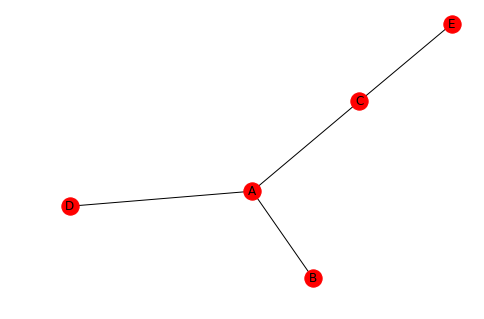

In [17]:
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()
